In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE


In [116]:
df = pd.read_csv('..\\Data\\encoded_dataset.csv')

In [117]:
# Define the feature and target variable
X = df[['Delivery_Time_mins']]
y = df['Cart_Abandonment_Flag']

In [118]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Scale the input feature
# X_scaled = scaler.fit_transform(X)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [120]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [127]:
log_reg = LogisticRegression(C=0.1, random_state=42)
log_reg.fit(X_train_res, y_train_res)
y_pred = log_reg.predict(X_test)



In [128]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 1.0
Confusion Matrix:
[[349   0]
 [  0 251]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       251

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



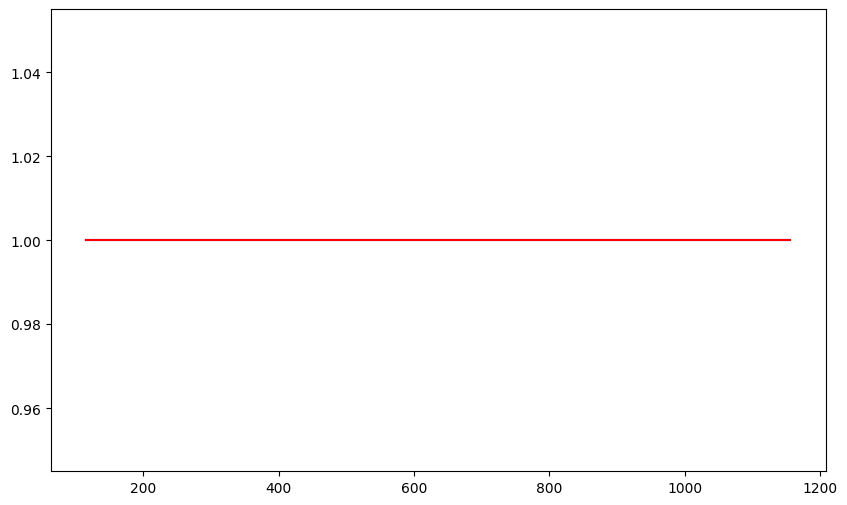

In [124]:
# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='red')

C:\Users\lokes\AppData\Local\Temp\ipykernel_12880\3225042717.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


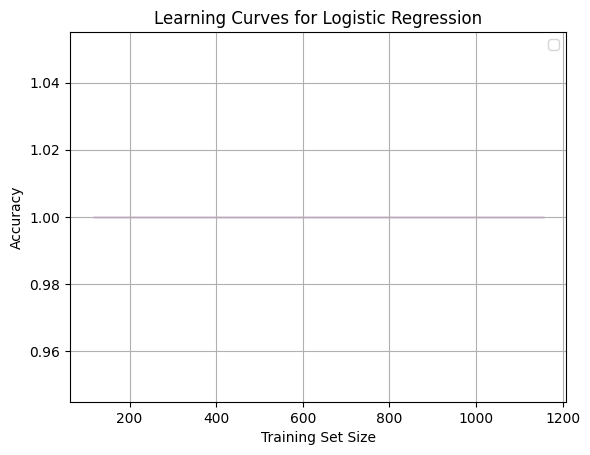

In [125]:
# Plot the fill between for the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='red', alpha=0.2)
# Add labels and title
plt.title('Learning Curves for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
